In [22]:
import polars as pl
import os
import matplotlib.pyplot as plt
import pywt

In [23]:
data = 'seismic_data/data'
# get all files in the data directory and its subdirectories

files = []
for root, dirs, file in os.walk(data):
    for f in file:
        files.append(os.path.join(root, f))

# read all files into a single DataFrame    
files = sorted(files)

In [24]:
files

['seismic_data/data/test/mars/0001.csv',
 'seismic_data/data/test/mars/0002.csv',
 'seismic_data/data/test/mars/0007.csv',
 'seismic_data/data/test/mars/0011.csv',
 'seismic_data/data/test/mars/0017.csv',
 'seismic_data/data/test/mars/0032.csv',
 'seismic_data/data/test/mars/0033.csv',
 'seismic_data/data/test/mars/0034.csv',
 'seismic_data/data/test/mars/0041.csv',
 'seismic_data/data/test/moon/12_b_00006.csv',
 'seismic_data/data/test/moon/12_b_00007.csv',
 'seismic_data/data/test/moon/12_b_00014.csv',
 'seismic_data/data/test/moon/12_b_00016.csv',
 'seismic_data/data/test/moon/12_b_00018.csv',
 'seismic_data/data/test/moon/12_b_00020.csv',
 'seismic_data/data/test/moon/12_b_00021.csv',
 'seismic_data/data/test/moon/12_b_00026.csv',
 'seismic_data/data/test/moon/12_b_00027.csv',
 'seismic_data/data/test/moon/12_b_00028.csv',
 'seismic_data/data/test/moon/12_b_00029.csv',
 'seismic_data/data/test/moon/12_b_00031.csv',
 'seismic_data/data/test/moon/12_b_00035.csv',
 'seismic_data/data/

In [25]:
sample = pl.read_csv(files[0])

In [26]:
sample

mq,time_rel,velocity
i64,f64,f64
0,0.0,0.0
0,0.05,0.004076
0,0.1,0.00731
0,0.15,-0.002066
0,0.2,0.003964
…,…,…
0,3599.7,0.05322
0,3599.75,0.008931
0,3599.8,-0.012888


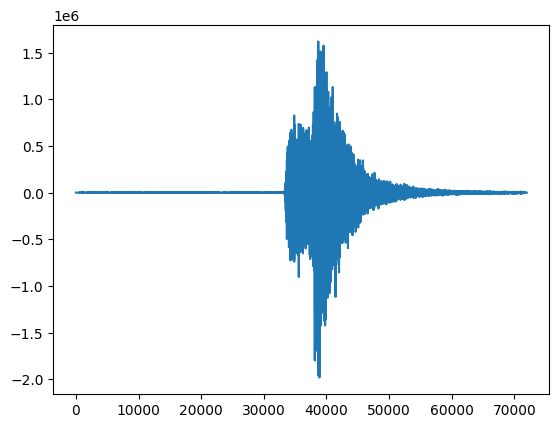

In [27]:
plt.plot(sample['velocity'])

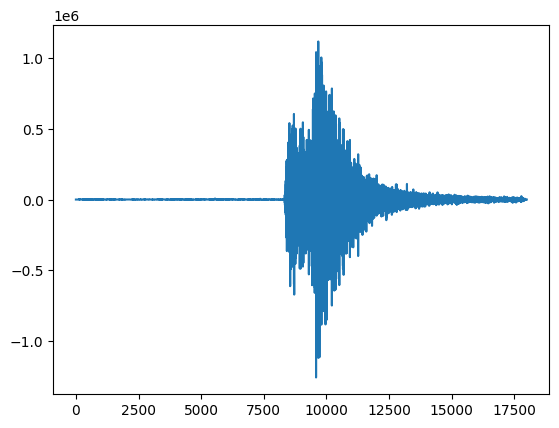

In [28]:
# apply wavelet transform to the velocity column
coeffs = pywt.wavedec(sample['velocity'], 'haar', level=2)
wavelet = coeffs[0]

plt.plot(wavelet)

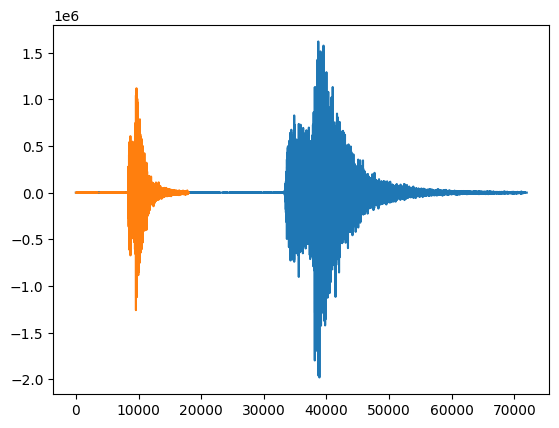

In [29]:
plt.plot(sample['velocity'])
plt.plot(wavelet)